# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = np.shape(train['features'])[0]

# TODO: Number of validation examples
n_validation = np.shape(valid['features'])[0]

# TODO: Number of testing examples.
n_test = np.shape(test['features'])[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(train['features'])[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.shape(np.unique(train['labels']))[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Text(0, 0.5, 'Height')

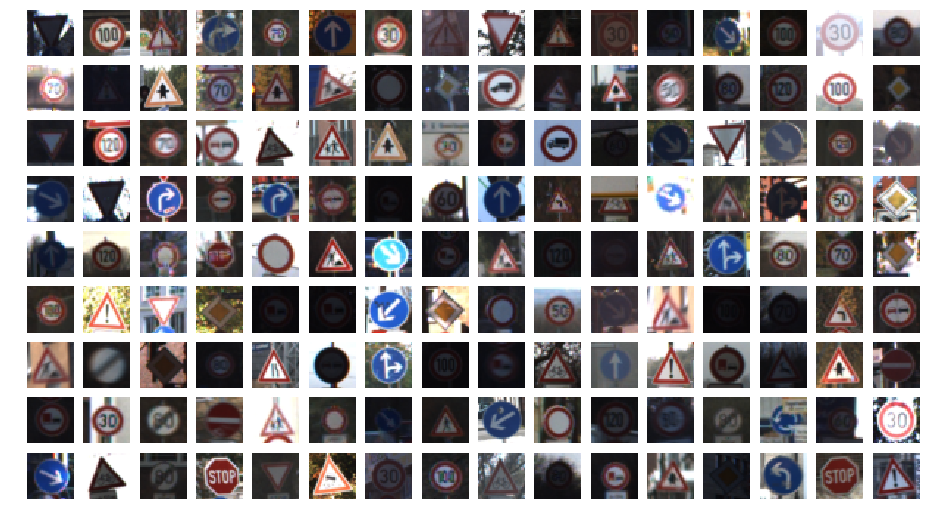

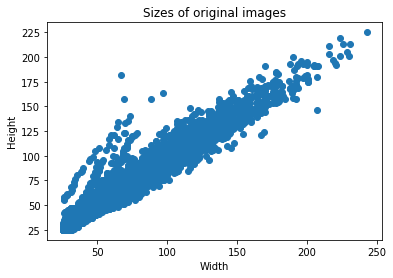

In [3]:
### Data exploration visualization code goes here.
import random
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Plot some random images from the dataset
fig, axs = plt.subplots(9, 16, figsize=(16,9))
for ax in axs.flat:
    ax.imshow(train['features'][random.randint(0, n_train-1)])
    ax.set_axis_off()

# Visualize the original image sizes
plt.figure()
plt.scatter(train['sizes'][:,0], train['sizes'][:,1])
plt.title('Sizes of original images')
plt.xlabel('Width')
plt.ylabel('Height')

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)

   ClassId
0       41
1       41
2       41
3       41
4       41

   ClassId           SignName
0       41  End of no passing
1       41  End of no passing
2       41  End of no passing
3       41  End of no passing
4       41  End of no passing

         SignName
ClassId          
0             180
1            1980
2            2010
3            1260
4            1770
5            1650
6             360
7            1290
8            1260
9            1320
10           1800
11           1170
12           1890
13           1920
14            690
15            540
16            360
17            990
18           1080
19            180
20            300
21            270
22            330
23            450
24            240
25           1350
26            540
27            210
28           

Text(0, 0.5, 'Count')

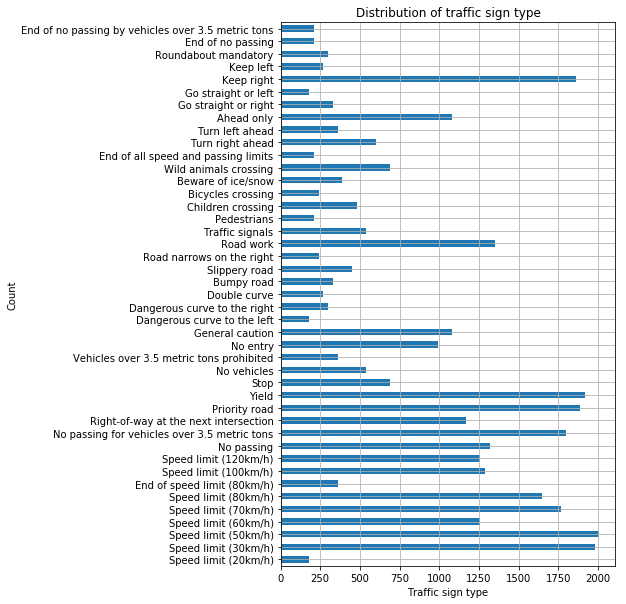

In [4]:
import pandas as pd
%matplotlib inline

# Load sign label mapping into pandas df
sign_labels = pd.read_csv('signnames.csv')
print(sign_labels.head())
print()

# Load training labels into pandas df
sign_data = pd.DataFrame(train['labels'])
sign_data.columns = ['ClassId']
print(sign_data.head())
print()

# Merge data frames
sign_data = sign_data.merge(sign_labels, on='ClassId')
print(sign_data.head())
print()

# Plot count of sign by class
print(sign_data.groupby('ClassId').count())
ax = sign_data.groupby(by='ClassId').count().plot.barh(figsize=(6, 10))
ax.set_yticklabels(sign_labels['SignName'])
ax.get_legend().remove()
plt.grid(1)
plt.title('Distribution of traffic sign type')
plt.xlabel('Traffic sign type')
plt.ylabel('Count')

There is not an even distribution of sign types in the training set. We can expect that the network will be better at learning on certain types of signs than others.

## Data augmentation
To increase the performance of the network, I will augment the training dataset using rotations, translations, shears and brightness/contrast manipulations

I will try to equalize the distribution of the sign types in the training set by augmenting the training examples for signs with low representation (e.g. Speed limit 20kph, Go straight or left)

### Augmentation functions

In [5]:
import cv2
def transform_image(img, angle, shear, translation):
    """
    Function to apply random transformations of rotation, shear and translation
    to the given image
    """
    
    # Source: 
    # https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html
    
    # Rotation
    angle_to_rotate = np.random.randint(-angle, angle)
    rows, cols, channels = img.shape
    rotation_mtx = cv2.getRotationMatrix2D((cols/2, rows/2), angle_to_rotate, 1)
    
    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    s1 = 5 + np.random.randint(-shear, shear)
    s2 = 20 + np.random.randint(-shear, shear)
    pts2 = np.float32([[s1,5],[s2,s1],[5,s2]])

    shear_mtx = cv2.getAffineTransform(pts1,pts2)

    # Translation
    translate_x = np.random.randint(-translation, translation)
    translate_y = np.random.randint(-translation, translation)
    translation_mtx = np.float32([[1,0,translate_x],[0,1,translate_y]])
    
    # Apply transformation matrices
    img = cv2.warpAffine(img, rotation_mtx, (cols, rows))
    img = cv2.warpAffine(img, translation_mtx, (cols, rows))
    img = cv2.warpAffine(img, shear_mtx, (cols, rows))
    
    return img

In [6]:
def brightness_image(img, brt, cnt):
    """
    Function to apply random brightness and contrast to the given image
    maximum value for brt and cnt is 127
    """
    
    # Source: https://stackoverflow.com/questions/50474302/how-do-i-adjust-brightness-contrast-and-vibrance-with-opencv-python
    
    brightness = np.random.randint(-brt, brt)
    contrast = np.random.randint(-cnt, cnt)
    img = np.int16(img)
    img = img * (contrast/127+1) - contrast + brightness
    img = np.clip(img, 0, 255)
    img = np.uint8(img)
    
    return img

In [7]:
def augment_image(img):
    img = brightness_image(img, 50, 20)
    img = transform_image(img, 10, 5, 5)
    return img

### Test augmentation functions

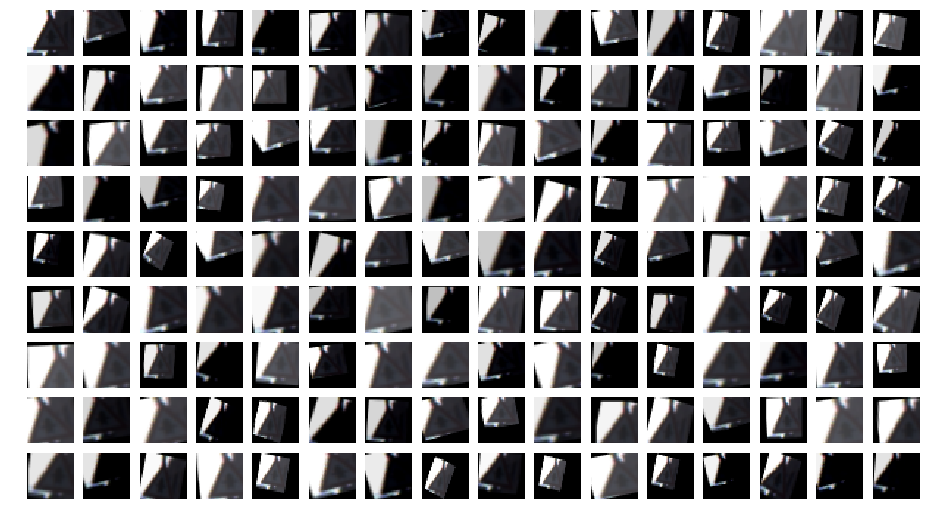

In [8]:
test_imgs = []
test_imgs.append(train['features'][np.random.randint(len(train['features']))])

for i in range(1, 9*16):
    test_imgs.append(augment_image(test_imgs[0]))

fig, axs = plt.subplots(9, 16, figsize=(16,9))
for idx, ax in enumerate(axs.flat):
    ax.imshow(test_imgs[idx])
    ax.set_axis_off()

### Generate new data

In [9]:
sign_data_sum = sign_data.groupby(by='ClassId').count().sort_values(by='SignName')

NUMBER_IMAGES_DESIRED = 1500
# Get all sign classes with fewer than 900 training examples
classes_to_augment = sign_data_sum[sign_data_sum['SignName'] < NUMBER_IMAGES_DESIRED]
print(classes_to_augment)

         SignName
ClassId          
0             180
37            180
19            180
32            210
27            210
41            210
42            210
24            240
29            240
39            270
21            270
40            300
20            300
36            330
22            330
6             360
16            360
34            360
30            390
23            450
28            480
26            540
15            540
33            599
14            690
31            690
17            990
18           1080
35           1080
11           1170
3            1260
8            1260
7            1290
9            1320
25           1350


Generated 32581 new images


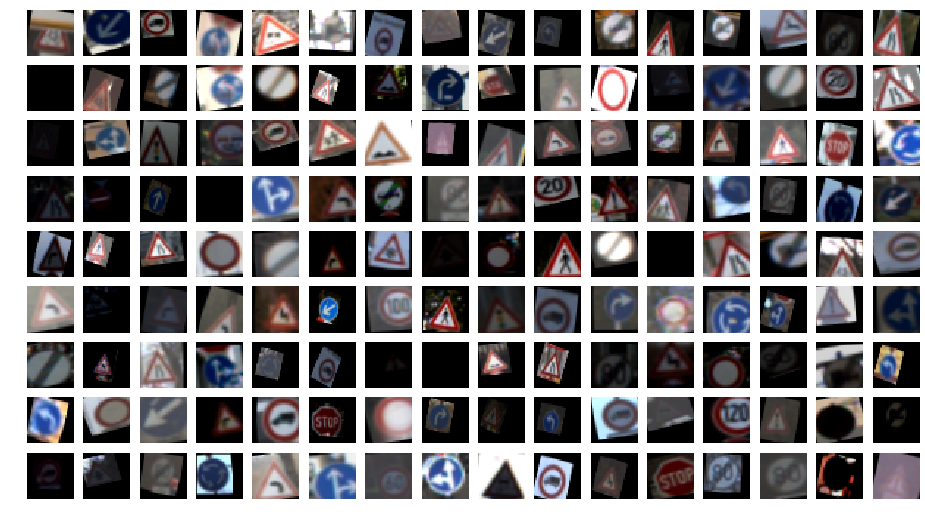

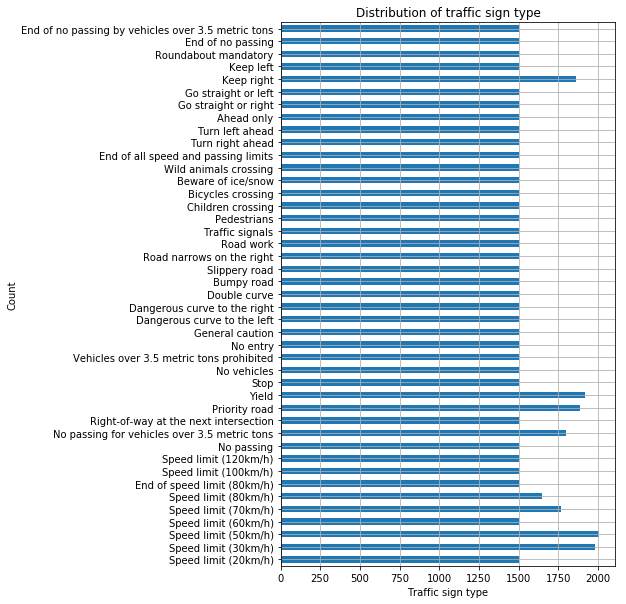

In [10]:
import pdb

def image_augment():
    """
    Creates an augmented image dataset
    This function only needs to be run once. It will pickle the output into 'data/'
    """
    from tqdm import tqdm_notebook as tqdm
    augment_images = np.empty((0, 32, 32, 3), dtype=np.uint8)
    augment_labels = np.array([], dtype=np.uint8)
    
    total_augmented = 0
    pbar_total = tqdm(total=classes_to_augment.shape[0], position=0)
    for row in classes_to_augment.iterrows():
        # figure out how many augment images we need
        n_augment_required = NUMBER_IMAGES_DESIRED - int(row[1])
        sign_class = row[0]

        # find indexes of class signs in training set
        idxs = np.where(train['labels'] == sign_class)
        
        temp_augment_images = np.array([], dtype=np.uint8)
        temp_augment_labels = np.array([], dtype=np.uint8)

        n_augmented = 0
        pbar = tqdm(total=n_augment_required, position=1, desc='Augmenting sign class {}'.format(sign_class))
        while n_augmented < n_augment_required:
            for idx in idxs[0]:
                aug_img = augment_image(train['features'][idx])
                if temp_augment_images.shape[0] == 0:
                    temp_augment_images = np.array([aug_img])
                else:
                    aug_img = np.array([aug_img])
                    temp_augment_images = np.append(temp_augment_images, aug_img, axis=0)
                temp_augment_labels = np.append(temp_augment_labels, np.array([sign_class]), axis=0)
                n_augmented += 1
                total_augmented += 1
                pbar.update(1)
                if n_augmented >= n_augment_required:
                    break

        augment_labels = np.append(augment_labels, temp_augment_labels, axis=0)
        augment_images = np.append(augment_images, temp_augment_images, axis=0)
        pbar_total.update(1)
        
    print("Generated {} new images".format(total_augmented))

    fig, axs = plt.subplots(9, 16, figsize=(16,9))
    for ax in axs.flat:
        ax.imshow(augment_images[random.randint(0, augment_images.shape[0]-1)])
        ax.set_axis_off()
    
    train_augment = np.vstack((train['features'], augment_images))
    label_augment = np.hstack((train['labels'], augment_labels))
    
    with open('data/augment_images.p', 'wb') as file:
        pickle.dump(augment_images, file)
        
    with open('data/augment_labels.p', 'wb') as file:
        pickle.dump(augment_labels, file)

    augment_sign_labels = pd.DataFrame(label_augment)
    augment_sign_labels.columns = ['ClassId']

    # Merge data frames
    augment_sign_data = augment_sign_labels.merge(sign_labels, on='ClassId')

    ax = augment_sign_data.groupby(by='ClassId').count().plot.barh(figsize=(6, 10))
    ax.set_yticklabels(sign_labels['SignName'])
    ax.get_legend().remove()
    plt.grid(1)
    plt.title('Distribution of traffic sign type')
    plt.xlabel('Traffic sign type')
    plt.ylabel('Count')

image_augment()   # only needs to be run once. 
                    #The rest of the time, the augmented data can be loaded from the pickle

## Load augmented data

Text(0, 0.5, 'Count')

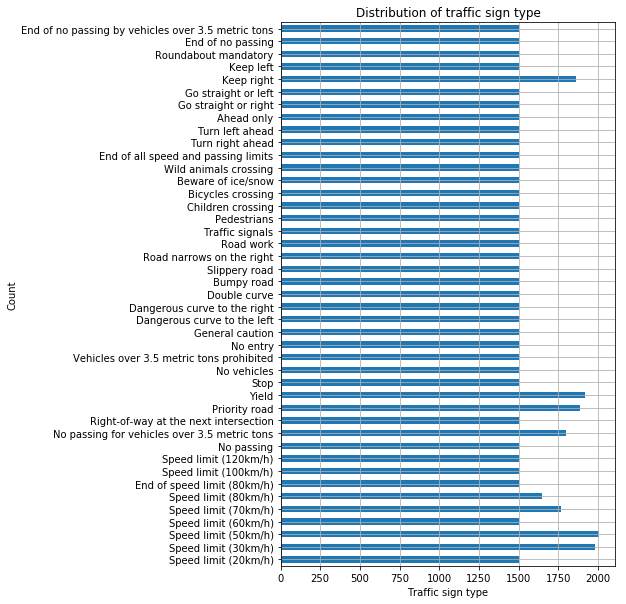

In [11]:
# Load augmented images
with open('data/augment_images.p', mode='rb') as f:
    augment_images = pickle.load(f)
    
with open('data/augment_labels.p', mode='rb') as f:
    augment_labels = pickle.load(f)
    
# Combine datasets
train['features'] = np.vstack((train['features'], augment_images))
train['labels'] = np.hstack((train['labels'], augment_labels))

# Visualize new distribution of traffic signs
augment_sign_labels = pd.DataFrame(train['labels'])
augment_sign_labels.columns = ['ClassId']

# Merge data frames
augment_sign_data = augment_sign_labels.merge(sign_labels, on='ClassId')

ax = augment_sign_data.groupby(by='ClassId').count().plot.barh(figsize=(6, 10))
ax.set_yticklabels(sign_labels['SignName'])
ax.get_legend().remove()
plt.grid(1)
plt.title('Distribution of traffic sign type')
plt.xlabel('Traffic sign type')
plt.ylabel('Count')

Now with a more evenly distributed training set, the accuracy of my network should increase

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [49]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Normalize all data
# X_train = (X_train - 128) / 128
# X_valid = (X_valid - 128) / 128
# X_test = (X_test - 128) / 128

# Re-split the examples into training and validation
# X_train, y_train = shuffle(X_train, y_train)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

X_train = train['features']
y_train = train['labels']

print("Training data: X = {}, Y = {}".format(X_train.shape, y_train.shape))
print("Validation data: X = {}, Y = {}".format(X_valid.shape, y_valid.shape))
print("Testing data: X = {}, Y = {}".format(X_test.shape, y_test.shape))

Training data: X = (67380, 32, 32, 3), Y = (67380,)
Validation data: X = (6960, 32, 32, 3), Y = (6960,)
Testing data: X = (12630, 32, 32, 3), Y = (12630,)


I only normalize the dataset. I am not converting to grayscale, because color information is essential in traffic sign recognition, and should increase the performance of the network

# Model Architecture

## LeNet
For reference, I have included the LeNet network from the previous lab

The only difference is that I have modified the input depth to accept RGB

In [50]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
ohy = tf.one_hot(y, 43)

## LeNet from TensorFlow Lab
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Convenience functions
Here I define some convenience functions to reduce the amount of boilerplate which needs to be written

In [51]:
def conv(x, in_channels, out_channels, ksize, padding='SAME', mu=0, sigma=0.1):
    W = tf.Variable(tf.truncated_normal(shape=(ksize, ksize, in_channels, out_channels), mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(out_channels))
    conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding=padding) + b
    return conv

def fc(x, in_shape, out_shape, mu, sigma):
    W = tf.Variable(tf.truncated_normal(shape=(in_shape, out_shape), mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(out_shape))
    fc = tf.matmul(x, W) + b
    return fc

## Modified LeNet ("LeBen")
Here I have modified the LeNet by changing the kernel sizes of the convolutions and the number of nodes in each layer

### Performance history
| git commit hash | training accuracy | validation accuracy | comment |
| --- | --- | --- | --- |
| 474962f | 0.942 | 0.641 | initial test |
| d20e174 | 0.274 | 0.219 | dropout with prob=0.5 |
| 2eee161 | 0.524 | 0.379 | increase epochs to 50<sup>1</sup> |
| 590dc97 | 0.986 | 0.778 | increase epochs to 100<sup>2</sup> |
| 20b8b0c | 0.960 | 0.762 | Data augmentation<sup>3</sup> |
| 9dcd18f | 0.992 | 0.972 | Better data augmentation and different network |

Notes
1. Dropout reduces the convergence rate of the network significantly, but increasing the number of epochs seems to help
2. Effect of number of epochs with dropout seems to plateau. Dropout is not enough to help the network generalize (validation accuracy plateaus at 78%)
3. Data augmentation did not seem to help at all

In [52]:
def LeBen(x):
    """
    My modification of LeNet to work for traffic signs
    """
    mu = 0
    sigma = 0.1
    
    # Layer 1 - Convolution. Input = 32x32x3, Output = 28x28x6
    c1 = conv(x, 3, 6, 5, padding='VALID')
    c1 = tf.nn.relu(c1)
    
    # Pooling. Input = 28x28x6, Output = 14x14x6
    c1 = tf.nn.max_pool(c1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2 - Convolution. Input = 14x14x6, Output = 10x10x16
    c2 = conv(c1, int(c1.shape[-1]), 16, 5, padding='VALID')
    c2 = tf.nn.relu(c2)
    
    # Pooling. Input = 10x10x16, output = 5x5x16
    c2 = tf.nn.max_pool(c2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3 - Convolution. Input = 5x5x16, output = 5x5x64
    c3 = conv(c2, int(c2.shape[-1]), 64, 1, padding='VALID')
    c3 = tf.nn.relu(c3)
    
    # Flatten. Input = 5x5x16, Output = 1600
    fc0 = flatten(c3)
    
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 6 - Fully connected. Input = 1600. Output = 120
    fc1 = fc(fc0, int(fc0.shape[-1]), 120, mu, sigma)
    fc1 = tf.nn.relu(fc1)
    
    # Layer 7 - Fully connected. Input = 120. Output = 84
    fc2 = fc(fc1, int(fc1.shape[-1]), 84, mu, sigma)
    fc2 = tf.nn.relu(fc2)
    
    # Layer 7 - Fully connected. Input = 84, Output = 43
    logits = fc(fc2, int(fc2.shape[-1]), 43, mu, sigma)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [64]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 1e-3
tf_rate = tf.placeholder(tf.float32, shape=[])

tf.random.set_random_seed(1337)

logits = LeBen(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=ohy, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=tf_rate)
training_operation = optimizer.minimize(loss_operation)

In [65]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(ohy, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    
    return total_accuracy / num_examples

<IPython.core.display.Javascript object>


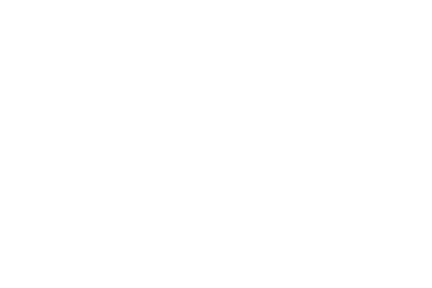

Training...
   Epoch   Train   Valid


KeyboardInterrupt: 

In [67]:
BATCH_SIZE = 128
EPOCHS = 40
from sklearn.utils import shuffle
import time
%matplotlib notebook

fig,ax = plt.subplots(1,1)
valid_acc_arr = np.array([],dtype=np.float32)
training_acc_arr = np.array([],dtype=np.float32)
fig.show()
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print("{:>8}{:>8}{:>8}".format('Epoch', 'Train', 'Valid'))
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        if i / EPOCHS < 0.4:
            learning_rate = 1e-2
        
        if i / EPOCHS < 0.8:
            learning_rate = 1e-3
            
        if i / EPOCHS > 0.8:
            learning_rate = 5e-4
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y:batch_y, keep_prob:0.5, tf_rate: learning_rate})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
        valid_acc_arr = np.append(valid_acc_arr, validation_accuracy)
        training_acc_arr = np.append(training_acc_arr, training_accuracy)
        print("{:8d}{:8.3f}{:8.3f}{:8.6f}".format(i+1, training_accuracy, validation_accuracy, learning_rate))
        
        ax.clear()
        ax.plot(np.arange(len(valid_acc_arr)) + 1, valid_acc_arr, label='Validation')
        ax.plot(np.arange(len(training_acc_arr)) + 1, training_acc_arr, label='Training')
        ax.legend()
        fig.canvas.draw()
        time.sleep(0.1)
        
        
    saver.save(sess, './traffic_sign_net')    
    print("Model saved")

### Running the model on test data
Having achieved a validation set accuracy of 97.2%, it is time to run the model on the test data

In [68]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test accuracy: {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_sign_net
Test accuracy: 0.928


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

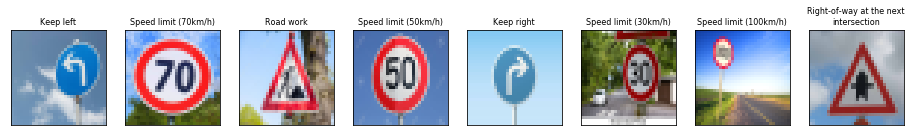

In [69]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import numpy as np
import cv2
import glob
import pdb
import matplotlib.pyplot as plt
from textwrap import wrap
%matplotlib inline
files = glob.glob("german-signs/*")

german_labels = np.array([])
german_data = np.empty((0, 32, 32, 3), dtype=np.uint8)

for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)
    img = np.array([img])
#     pdb.set_trace()
    german_data = np.append(german_data, img, axis=0)
    
    # filenames saved as <label>_<name> e.g. 1_30kph.jpg
    label = file.split("/")[1].split("_")[0]
    
    german_labels = np.append(german_labels, int(label))

plt.figure(figsize=(16,9))

for i, img in enumerate(german_data):
    ax = plt.subplot(1,len(german_data),i+1)
    plt.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    label_name = sign_labels.loc[sign_labels['ClassId'] == german_labels[i], 'SignName'].values[0]
    ax.set_title("\n".join(wrap(label_name, 30)), fontsize=8)

### Predict the Sign Type for Each Image

In [70]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
label_pred = tf.argmax(logits, 1)

top5 = tf.nn.top_k(logits, 5)

pred_labels = []

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    pred_labels = sess.run(label_pred, feed_dict={x: german_data, keep_prob: 1})
    print(pred_labels)

INFO:tensorflow:Restoring parameters from ./traffic_sign_net
[40  4 25  1 33  0 33 11]


3/8 correct predictions (37.5%)


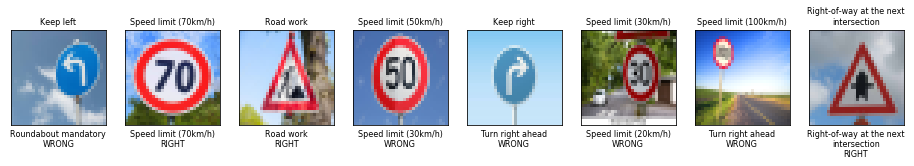

In [71]:
plt.figure(figsize=(16,9))
n_right = 0
n_wrong = 0
for i, img in enumerate(german_data):
    ax = plt.subplot(1,len(german_data),i+1)
    plt.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    label_name = sign_labels.loc[sign_labels['ClassId'] == german_labels[i], 'SignName'].values[0]
    pred_label_name = sign_labels.loc[sign_labels['ClassId'] == pred_labels[i], 'SignName'].values[0]
    if label_name == pred_label_name:
        pred_label_name = "\n".join(wrap(pred_label_name, 30)) + "\nRIGHT"
        n_right += 1
    else:
        pred_label_name = "\n".join(wrap(pred_label_name, 30)) + "\nWRONG"
        n_wrong += 1
    
    ax.set_title("\n".join(wrap(label_name, 30)), fontsize=8)
    ax.set_xlabel(pred_label_name, fontsize=8)
    
print("{}/{} correct predictions ({:.1f}%)".format(n_right, n_right + n_wrong, n_right / (n_right + n_wrong) * 100))

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")